<a href="https://colab.research.google.com/github/MERITOKAMIL/ML_PRO/blob/master/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


print(f"version sklearn: {sklearn.__version__} ")
print(f"version numpy: {np.__version__} ")

print(f"version seaborn: {sns.__version__} ")


version sklearn: 1.6.0 
version numpy: 1.26.4 
version seaborn: 0.13.2 


**DATA**

In [92]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [93]:
df.shape

(398, 9)

1. Éliminer les lignes contenant des valeurs manquantes

In [94]:
df.isna().sum(axis=0)

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


<Axes: >

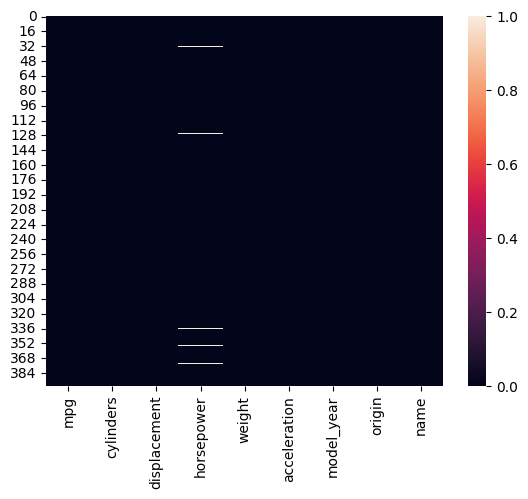

In [95]:
sns.heatmap(df.isna())

In [104]:
df_cleaned=df.dropna()
df_cleaned

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [97]:
df_cleaned.isna().sum(axis=0)

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


2. Séparer le jeu de données en X/y (y est la variable mpg et X tout le reste)

In [98]:
X=df_cleaned.drop("mpg", axis=1)
y=df_cleaned["mpg"]


In [99]:
print(f"Dimension de X:{X.shape}")
print(f"Dimension de y:{y.shape}")
print(f" X:{X}")
print(f" y :{y}")

Dimension de X:(392, 8)
Dimension de y:(392,)
 X:     cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          24.6          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

     origin   

3. Séparer le jeu de données en trainset et testset (en écrivant `train_test_split(X, y)`)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

4. Extraire le constructeur automobile de la variable name et mettre le résultat dans une variable "constructor" (si vous l'ignorez, mettez "other"), puis éliminer la colonne "name"

In [105]:
df_cleaned

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [107]:
df_cleaned.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


5. Encoder les catégories de la maniere la plus pertinente

In [109]:
# Identifier les colonnes de type object ou category
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégoriques :", list(categorical_columns))



Colonnes catégoriques : ['origin', 'name']


In [112]:
df_encoder

,origin_europe,origin_japan,origin_usa,constructor_amc,constructor_audi,constructor_bmw,constructor_buick,constructor_cadillac,constructor_capri,constructor_chevroelt,...,constructor_renault,constructor_saab,constructor_subaru,constructor_toyota,constructor_toyouta,constructor_triumph,constructor_vokswagen,constructor_volkswagen,constructor_volvo,constructor_vw
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
389,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
df_encoder_final = pd.concat([df_cleaned, df_encoder], axis=1)
df_encoder_final

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_europe,...,constructor_renault,constructor_saab,constructor_subaru,constructor_toyota,constructor_toyouta,constructor_triumph,constructor_vokswagen,constructor_volkswagen,constructor_volvo,constructor_vw
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,usa,buick skylark 320,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,usa,plymouth satellite,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,usa,amc rebel sst,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,usa,ford torino,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
df_encoder_final.dropna(axis=0, inplace=True)

6. Utiliser un Polynomial Feature de degré 2 sur les variables Acceleration, Horsepower et weight

In [115]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(df_cleaned[["acceleration", "horsepower", "weight"]])
poly.transform(df_cleaned[["acceleration", "horsepower", "weight"]])
df_poly=pd.DataFrame(poly.transform(df_cleaned[["acceleration", "horsepower", "weight"]]), columns=poly.get_feature_names_out())

In [116]:
df_poly = pd.concat([df_encoder_final, df_poly], axis=1)
df_poly

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_europe,...,constructor_vw,acceleration,horsepower,weight,acceleration^2,acceleration horsepower,acceleration weight,horsepower^2,horsepower weight,weight^2
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu,0.0,...,0.0,12.0,130.0,3504.0,144.00,1560.0,42048.0,16900.0,455520.0,12278016.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,usa,buick skylark 320,0.0,...,0.0,11.5,165.0,3693.0,132.25,1897.5,42469.5,27225.0,609345.0,13638249.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,usa,plymouth satellite,0.0,...,0.0,11.0,150.0,3436.0,121.00,1650.0,37796.0,22500.0,515400.0,11806096.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,usa,amc rebel sst,0.0,...,0.0,12.0,150.0,3433.0,144.00,1800.0,41196.0,22500.0,514950.0,11785489.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,usa,ford torino,0.0,...,0.0,10.5,140.0,3449.0,110.25,1470.0,36214.5,19600.0,482860.0,11895601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.0,100.0,3336.0,289.00,1700.0,56712.0,10000.0,333600.0,11128896.0
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.4,132.0,2910.0,129.96,1504.8,33174.0,17424.0,384120.0,8468100.0
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.4,92.0,2620.0,207.36,1324.8,37728.0,8464.0,241040.0,6864400.0
354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.4,80.0,3230.0,416.16,1632.0,65892.0,6400.0,258400.0,10432900.0


In [117]:
df_poly.dropna(axis=0, inplace=True)

In [118]:
df_poly

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_europe,...,constructor_vw,acceleration,horsepower,weight,acceleration^2,acceleration horsepower,acceleration weight,horsepower^2,horsepower weight,weight^2
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu,0.0,...,0.0,12.0,130.0,3504.0,144.00,1560.0,42048.0,16900.0,455520.0,12278016.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,usa,buick skylark 320,0.0,...,0.0,11.5,165.0,3693.0,132.25,1897.5,42469.5,27225.0,609345.0,13638249.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,usa,plymouth satellite,0.0,...,0.0,11.0,150.0,3436.0,121.00,1650.0,37796.0,22500.0,515400.0,11806096.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,usa,amc rebel sst,0.0,...,0.0,12.0,150.0,3433.0,144.00,1800.0,41196.0,22500.0,514950.0,11785489.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,usa,ford torino,0.0,...,0.0,10.5,140.0,3449.0,110.25,1470.0,36214.5,19600.0,482860.0,11895601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,38.0,6.0,262.0,85.0,3015.0,17.0,82.0,usa,oldsmobile cutlass ciera (diesel),0.0,...,0.0,15.6,86.0,2790.0,243.36,1341.6,43524.0,7396.0,239940.0,7784100.0
388,26.0,4.0,156.0,92.0,2585.0,14.5,82.0,usa,chrysler lebaron medallion,1.0,...,1.0,24.6,52.0,2130.0,605.16,1279.2,52398.0,2704.0,110760.0,4536900.0
389,22.0,6.0,232.0,112.0,2835.0,14.7,82.0,usa,ford granada l,0.0,...,0.0,11.6,84.0,2295.0,134.56,974.4,26622.0,7056.0,192780.0,5267025.0
390,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,japan,toyota celica gt,0.0,...,0.0,18.6,79.0,2625.0,345.96,1469.4,48825.0,6241.0,207375.0,6890625.0


In [119]:
df_poly.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'origin_europe',
       'origin_japan', 'origin_usa', 'constructor_amc', 'constructor_audi',
       'constructor_bmw', 'constructor_buick', 'constructor_cadillac',
       'constructor_capri', 'constructor_chevroelt', 'constructor_chevrolet',
       'constructor_chevy', 'constructor_chrysler', 'constructor_datsun',
       'constructor_dodge', 'constructor_fiat', 'constructor_ford',
       'constructor_hi', 'constructor_honda', 'constructor_maxda',
       'constructor_mazda', 'constructor_mercedes',
       'constructor_mercedes-benz', 'constructor_mercury',
       'constructor_nissan', 'constructor_oldsmobile', 'constructor_opel',
       'constructor_peugeot', 'constructor_plymouth', 'constructor_pontiac',
       'constructor_renault', 'constructor_saab', 'constructor_subaru',
       'constructor_toyota', 'constructor_toyouta', 'constructor_triumph',
       'construct

7. Normaliser les variables cylinders, model_year, usa, et constructeur avec MinMaxScaler, et les autres variables avec un StandardScaler

In [120]:
scaler= MinMaxScaler()
scaler.fit(df_poly[["cylinders", "model_year"]])

MinMaxScaler()

In [121]:
df_poly[["cylinders", "model_year"]]=scaler.transform(df_poly[["cylinders", "model_year"]])

In [122]:
df_stscaler=df_poly.drop(["cylinders", "model_year"], axis=1, inplace=True)